In [ ]:
函数关系y与x：
（仅限数据分析领域）
    线性关系
    抛物线关系
    对数关系

# 线性回归模型与算法
    - 正则化方法
        - 岭回归、LASSO算法、弹性网络
    - 算法汇总
        - 最小二乘法、极大似然估计、正则化的最小二乘法

In [ ]:
单变量线性回归：收入对信用卡支出有没有影响
    构建x与y的关系

In [ ]:
相关性分析：两个变量之间有没有关系

In [ ]:
第一步：相关性分析，判断有没有关系
第二部：回归，有关系的构建关系模型

In [ ]:
## 简单线性回归
Y = β0 + β1X1 + ∝
    ∝：扰动项，不能被X所解释的Y的定义
    β0：截距

In [ ]:
线性回归：做一条线使得其距离所有点的竖直距离（残差）最小

残差平方和 = sum(（y的真实值 - y的预测值）^2)
求解β1

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols  #线性回归（最小二乘法）

os.chdir(r"E:\Ajiao\LiXian\资料\技术实详解与商业实战\280_Ben_八大直播八大案例配套课件\第四章\提交-第四讲：统计建模与分析报告-二手房价格分析报告\脚本\7linearmodel")
#pd.set_option('display.max_columns', 8)


In [2]:
raw = pd.read_csv(r'creditcard_exp.csv', skipinitialspace=True)
raw.head()

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
0,19,1,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,1600,0.102361,3
1,5,1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,1024,0.051184,2
2,95,0,NaN,NaN,1,36,8.40000,0,0,88.61,7.490000,1296,0.910000,1
3,86,1,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,1681,0.197218,3
4,50,1,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,784,0.062676,2


In [3]:
exp = raw[raw['avg_exp'].notnull()].copy().iloc[:, 2:].drop('age2',axis=1)

exp_new = raw[raw['avg_exp'].isnull()].copy().iloc[:, 2:].drop('age2',axis=1)

exp.describe(include='all')


,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,983.655429,6.787787,0.285714,31.157143,7.424706,0.385714,0.028571,74.540857,8.005472,-0.580766,1.928571
std,446.294237,0.476035,0.455016,7.206349,3.077986,0.490278,0.167802,36.949228,3.070744,0.432808,0.873464
min,163.180000,5.094854,0.000000,20.000000,3.493900,0.000000,0.000000,13.130000,3.828842,-1.526850,0.000000
25%,697.155000,6.547003,0.000000,26.000000,5.175662,0.000000,0.000000,49.302500,5.915553,-0.887981,1.000000
50%,884.150000,6.784627,0.000000,30.000000,6.443525,0.000000,0.000000,65.660000,7.084184,-0.612068,2.000000
75%,1229.585000,7.114415,1.000000,36.000000,8.494237,1.000000,0.000000,105.067500,9.123105,-0.302082,3.000000
max,2430.030000,7.795659,1.000000,55.000000,16.900150,1.000000,1.000000,157.900000,18.427000,0.259337,3.000000


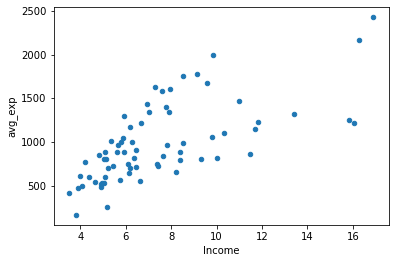

In [4]:
# 第一步：散点图，看收入与支出的关系
exp.plot('Income','avg_exp', kind='scatter')
plt.show()

In [5]:
exp[['Income', 'avg_exp', 'Age', 'dist_home_val']].corr(method='pearson')

,Income,avg_exp,Age,dist_home_val
Income,1.000000,0.674011,0.369129,0.249153
avg_exp,0.674011,1.000000,0.258478,0.319499
Age,0.369129,0.258478,1.000000,0.109323
dist_home_val,0.249153,0.319499,0.109323,1.000000


In [6]:
#简单线性回归：‘avg_exp ~ Income’是y~x
# 调用的是ols
lm_s = ols('avg_exp ~ Income', data=exp).fit()
lm_s.summary()# 结果输出
# Intercept是β0
# Income是β1

# 结果中 先看β1的P值，即P>|t|； 显著了β1才有意义，不显著的话β1在模型中是没有意义的
# 上半部分（整体的）是没有意义的
# R-squared:是描述模型优劣的，越高越好（最小为0，最小为1）
# Adj. R-squared:是选择模型用的，只有多个模型对比才能有意义，单个模型没有意义
# F-statistic:方差分析，没有用；Prob (F-statistic):只要有一个变量是显著的，则其必然是显著的
# AIC   BIC：模型筛选用的，和Adj. R-squared用处一样

# Omnibus及其后半部分:是对残差的检验

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     56.61
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           1.60e-10
Time:                        09:12:51   Log-Likelihood:                -504.69
No. Observations:                  70   AIC:                             1013.
Df Residuals:                      68   BIC:                             1018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    258.0495    104.290      2.474      0.016      49.942     466.157
Income        97.7286     12.989      7.524      0.000      71.809     123.648
==============================================================================
Omnibus:                        3.714   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.507
Skew:                           0.485   Prob(JB):                        0.173
Kurtosis:                       2.490   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 多元线性回归

In [7]:
回归模型做变量筛选：
    向前法
    向后法
    逐步法

SyntaxError: invalid character in identifier (<ipython-input-7-03ee2362fb6b>, line 1)

In [8]:
每一个x对y进行分析
N个x同时和y进行分析，由于x相互之间是由相关性的，会导致x提供的增量信息很少，所以变得不显著了

NameError: name '每一个x对y进行分析' is not defined

In [ ]:
希望模型能自动筛选掉无法提供增量信息的x

In [ ]:
向前法：
    拿每个x分别对y做模型：
    选择标准（R^2  P值最小、AIC或BIC最小）
    
    选择第二个变量时，拿Y-β*第一个变量 = 残差
    
    第二部的残差

In [22]:
lm_s.predict(exp)

0     1825.141904
1     1806.803136
3     1379.274813
4     1568.506658
5     1238.281793
         ...     
93     654.358427
94     638.511738
96     686.061578
97     599.503376
98     630.971978
Length: 70, dtype: float64

In [7]:
pd.DataFrame([lm_s.predict(exp),lm_s.resid],index=['predict','resid']).T.head()

,predict,resid
0,1825.141904,-608.111904
1,1806.803136,-555.303136
3,1379.274813,-522.704813
4,1568.506658,-246.676658
5,1238.281793,-422.251793


In [ ]:
lm_s：简单线性回归
exp: 要做预测的X值
resid: 残差=实际值-预测值

In [8]:
#多元线性回归
#statsmodels种的语法和R的语法是一模一样的
lm_m = ols('avg_exp ~ Age+ Income + dist_home_val + dist_avg_income',data=exp).fit()
#定义模型之后拟合模型
lm_m.summary()#输出拟合结果

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     19.20
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           1.82e-10
Time:                        09:12:57   Log-Likelihood:                -498.59
No. Observations:                  70   AIC:                             1007.
Df Residuals:                      65   BIC:                             1018.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -32.0078    186.874     -0.171      0.865    -405.221     341.206
Age                 1.3723      5.605      0.245      0.807      -9.822      12.566
Income           -166.7204     87.607     -1.903      0.061    -341.684       8.243
dist_home_val       1.5329      1.057      1.450      0.152      -0.578       3.644
dist_avg_income   261.8827     87.807      2.982      0.004      86.521     437.245
==============================================================================
Omnibus:                        5.234   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                5.174
Skew:                           0.625   Prob(JB):                       0.0752
Kurtosis:                       2.540   Cond. No.                         459.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#向前回归法
'''forward select'''
def forward_select(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    while remaining:
        aic_with_candidates=[]
        for candidate in remaining:
            formula = "{} ~ {}".format(
                response,' + '.join(selected + [candidate]))
            aic = ols(formula=formula, data=data).fit().aic
            aic_with_candidates.append((aic, candidate))
        aic_with_candidates.sort(reverse=True)
        best_new_score, best_candidate=aic_with_candidates.pop()
        if current_score > best_new_score: 
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            print ('aic is {},continuing!'.format(current_score))
        else:        
            print ('forward selection over!')
            break
            
    formula = "{} ~ {} ".format(response,' + '.join(selected))
    print('final formula is {}'.format(formula))
    model = ols(formula=formula, data=data).fit()
    return(model)


In [12]:
data_for_select = exp[['avg_exp', 'Income', 'Age', 'dist_home_val', 
                       'dist_avg_income']]
lm_m = forward_select(data=data_for_select, response='avg_exp')
print(lm_m.rsquared)
#设定的是AIC为标准，输出可以看出AIC在逐渐减小，在减小到一定程度就不再继续减小。最后的模型是dist_avg_income + Income + dist_home_val 三个变量
#这三个变量构成的线性回归效果是最好的，对应的R^2值是0.541151292841195

aic is 1007.6801413968117,continuing!
aic is 1005.4969816306302,continuing!
aic is 1005.2487355956046,continuing!
forward selection over!
final formula is avg_exp ~ dist_avg_income + Income + dist_home_val 
0.541151292841195


In [13]:
lm_m.summary()
#通过模型筛选找出的最好模型
#得出的结果仍然有大于的，因为AIC算法是一种贪婪算法，只求AIC最小的模型，并不能保证每个变量都是显著的，


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     25.95
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           3.34e-11
Time:                        11:21:21   Log-Likelihood:                -498.62
No. Observations:                  70   AIC:                             1005.
Df Residuals:                      66   BIC:                             1014.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.3507    122.525      0.019      0.985    -242.278     246.980
dist_avg_income   260.7522     87.058      2.995      0.004      86.934     434.570
Income           -164.4378     86.487     -1.901      0.062    -337.115       8.239
dist_home_val       1.5396      1.049      1.468      0.147      -0.555       3.634
==============================================================================
Omnibus:                        5.379   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.367
Skew:                           0.642   Prob(JB):                       0.0683
Kurtosis:                       2.563   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
变量筛选的步骤：
    两两变量相关性检验
    逐步法进行变量筛选

In [5]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

os.chdir(r"E:\Ajiao\LiXian\资料\技术实详解与商业实战\280_Ben_八大直播八大案例配套课件\第四章\提交-第四讲：统计建模与分析报告-二手房价格分析报告\脚本\7linearmodel")


In [3]:
#数据清洗
raw = pd.read_csv(r'creditcard_exp.csv', skipinitialspace=True)
raw.head()

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
0,19,1,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,1600,0.102361,3
1,5,1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,1024,0.051184,2
2,95,0,NaN,NaN,1,36,8.40000,0,0,88.61,7.490000,1296,0.910000,1
3,86,1,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,1681,0.197218,3
4,50,1,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,784,0.062676,2


In [23]:
exp = raw[raw['avg_exp'].notnull()].copy().iloc[:, 2:].drop('age2',axis=1)
exp

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class
0,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,0.102361,3
1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,0.051184,2
3,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,0.197218,3
4,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,0.062676,2
5,816.03,6.704451,1,41,10.03015,0,1,119.76,10.332263,-0.302113,3
...,...,...,...,...,...,...,...,...,...,...,...
93,491.04,6.196526,0,21,4.05520,0,0,36.81,4.349158,-0.293958,1
94,468.61,6.149771,0,20,3.89305,0,0,66.75,4.551105,-0.658055,1
96,593.92,6.386745,0,30,4.37960,0,0,124.23,5.040632,-0.661032,1
97,418.78,6.037346,0,21,3.49390,0,0,34.46,3.828842,-0.334942,1


In [19]:
exp = raw[raw['avg_exp'].notnull()].copy().iloc[:, 2:].drop('age2',axis=1)

exp_new = raw[raw['avg_exp'].isnull()].copy().iloc[:, 2:].drop('age2',axis=1)

exp.describe(include='all')

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,983.655429,6.787787,0.285714,31.157143,7.424706,0.385714,0.028571,74.540857,8.005472,-0.580766,1.928571
std,446.294237,0.476035,0.455016,7.206349,3.077986,0.490278,0.167802,36.949228,3.070744,0.432808,0.873464
min,163.180000,5.094854,0.000000,20.000000,3.493900,0.000000,0.000000,13.130000,3.828842,-1.526850,0.000000
25%,697.155000,6.547003,0.000000,26.000000,5.175662,0.000000,0.000000,49.302500,5.915553,-0.887981,1.000000
50%,884.150000,6.784627,0.000000,30.000000,6.443525,0.000000,0.000000,65.660000,7.084184,-0.612068,2.000000
75%,1229.585000,7.114415,1.000000,36.000000,8.494237,1.000000,0.000000,105.067500,9.123105,-0.302082,3.000000
max,2430.030000,7.795659,1.000000,55.000000,16.900150,1.000000,1.000000,157.900000,18.427000,0.259337,3.000000


In [20]:
exp[['Income', 'avg_exp', 'Age', 'dist_home_val']].corr(method='pearson')

,Income,avg_exp,Age,dist_home_val
Income,1.000000,0.674011,0.369129,0.249153
avg_exp,0.674011,1.000000,0.258478,0.319499
Age,0.369129,0.258478,1.000000,0.109323
dist_home_val,0.249153,0.319499,0.109323,1.000000


In [21]:
#简单线性回归
lm_s = ols('avg_exp ~ Income', data=exp).fit()
lm_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     56.61
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           1.60e-10
Time:                        13:51:43   Log-Likelihood:                -504.69
No. Observations:                  70   AIC:                             1013.
Df Residuals:                      68   BIC:                             1018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    258.0495    104.290      2.474      0.016      49.942     466.157
Income        97.7286     12.989      7.524      0.000      71.809     123.648
==============================================================================
Omnibus:                        3.714   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.507
Skew:                           0.485   Prob(JB):                        0.173
Kurtosis:                       2.490   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""